# Pekka ja susi: Vahvistusoppimisen perusteet

Tässä opetusohjelmassa opimme soveltamaan vahvistusoppimista reitinetsintäongelmaan. Asetelma on saanut inspiraationsa [Pekka ja susi](https://en.wikipedia.org/wiki/Peter_and_the_Wolf) -musiikkisadusta, jonka on säveltänyt venäläinen säveltäjä [Sergei Prokofjev](https://en.wikipedia.org/wiki/Sergei_Prokofiev). Tarina kertoo nuoresta pioneeri Pekasta, joka rohkeasti lähtee talostaan metsän aukealle jahtamaan sutta. Me koulutamme koneoppimisalgoritmeja, jotka auttavat Pekkaa tutkimaan ympäröivää aluetta ja rakentamaan optimaalisen navigointikartan.

Aloitetaan ensin hyödyllisten kirjastojen tuonnilla:


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## Yleiskatsaus vahvistusoppimiseen

**Vahvistusoppiminen** (RL) on oppimistekniikka, jonka avulla voidaan oppia **agentin** optimaalinen käyttäytyminen jossakin **ympäristössä** suorittamalla useita kokeita. Agentilla tässä ympäristössä tulisi olla jokin **tavoite**, joka määritellään **palkkiofunktion** avulla.

## Ympäristö

Yksinkertaisuuden vuoksi tarkastellaan Peterin maailmaa, joka on neliölauta kooltaan `width` x `height`. Jokainen ruutu tässä laudassa voi olla:
* **maa**, jolla Peter ja muut olennot voivat kävellä
* **vesi**, jolla ei tietenkään voi kävellä
* **puu** tai **ruoho** – paikka, jossa voi levätä
* **omena**, joka edustaa jotain, jonka Peter mielellään löytäisi ravinnokseen
* **susi**, joka on vaarallinen ja jota tulisi välttää

Ympäristön kanssa työskentelyä varten määrittelemme luokan nimeltä `Board`. Jotta emme täyttäisi tätä muistikirjaa liikaa, olemme siirtäneet kaiken laudan kanssa työskentelyyn liittyvän koodin erilliseen `rlboard`-moduuliin, jonka nyt tuomme käyttöön. Voit tarkastella tätä moduulia saadaksesi lisätietoja toteutuksen yksityiskohdista.


Luodaan nyt satunnainen pelilauta ja katsotaan, miltä se näyttää:


In [4]:
# code block 1

## Toiminnot ja Säännöt

Esimerkissämme Peterin tavoitteena olisi löytää omena samalla välttäen sutta ja muita esteitä. Määrittele nämä toiminnot sanakirjana ja yhdistä ne vastaaviin koordinaattimuutosten pareihin.


In [5]:
# code block 2

Agenttimme (Peter) strategia määritellään niin sanotulla **politiikalla**. Tarkastellaan yksinkertaisinta politiikkaa, jota kutsutaan **satunnaiseksi kävelyksi**.

## Satunnainen kävely

Ratkaistaan ensin ongelmamme toteuttamalla satunnaisen kävelyn strategia.


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## Palkkiofunktio

Jotta voimme tehdä politiikastamme älykkäämmän, meidän täytyy ymmärtää, mitkä siirrot ovat "parempia" kuin toiset.


In [8]:
#code block 5

## Q-oppiminen

Luo Q-taulukko eli moniulotteinen taulukko. Koska laudallamme on mitat `width` x `height`, voimme esittää Q-taulukon numpy-taulukkona, jonka muoto on `width` x `height` x `len(actions)`:


In [9]:
# code block 6

Anna Q-taulukko `plot`-funktiolle, jotta taulukko voidaan visualisoida laudalla:


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## Q-Learningin ydin: Bellmanin yhtälö ja oppimisalgoritmi

Kirjoita pseudokoodi oppimisalgoritmillemme:

* Alusta Q-taulukko Q samoilla arvoilla kaikille tiloille ja toimille
* Aseta oppimisnopeus $\alpha\leftarrow 1$
* Toista simulaatio monta kertaa
   1. Aloita satunnaisesta sijainnista
   1. Toista
        1. Valitse toiminto $a$ tilassa $s$
        2. Suorita toiminto siirtymällä uuteen tilaan $s'$
        3. Jos kohtaamme pelin päättymisehdon tai kokonaispalkkio on liian pieni - lopeta simulaatio  
        4. Laske palkkio $r$ uudessa tilassa
        5. Päivitä Q-funktio Bellmanin yhtälön mukaan: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$
        7. Päivitä kokonaispalkkio ja pienennä $\alpha$.

## Hyödyntäminen vs. Tutkiminen

Paras lähestymistapa on tasapainottaa tutkimisen ja hyödyntämisen välillä. Kun opimme enemmän ympäristöstämme, olemme todennäköisemmin seuraamassa optimaalista reittiä, mutta valitsemme silloin tällöin tutkimattoman polun.

## Python-toteutus

Nyt olemme valmiita toteuttamaan oppimisalgoritmin. Ennen sitä tarvitsemme myös funktion, joka muuntaa Q-taulukon mielivaltaiset numerot todennäköisyysvektoriksi vastaaville toiminnoille:


In [10]:
# code block 7

Lisäämme pienen määrän `eps` alkuperäiseen vektoriin välttääksemme jakamisen nollalla alkuvaiheessa, kun kaikki vektorin komponentit ovat identtisiä.

Varsinainen oppimisalgoritmi, jota suoritamme 5000 kokeilua varten, kutsutaan myös **epookeiksi**:


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

Kun tämä algoritmi on suoritettu, Q-taulukko tulisi päivittää arvoilla, jotka määrittävät eri toimien houkuttelevuuden kussakin vaiheessa. Visualisoi taulukko täällä:


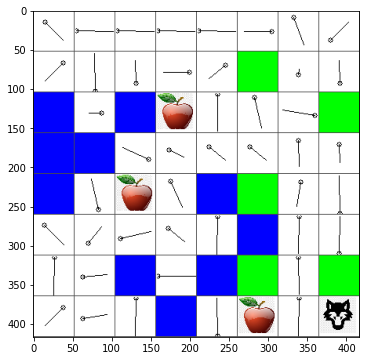

In [43]:
m.plot(Q)

## Politiikan tarkistaminen

Koska Q-taulukko listaa kunkin toiminnon "houkuttelevuuden" jokaisessa tilassa, sen avulla on helppo määrittää tehokas navigointi maailmassamme. Yksinkertaisimmassa tapauksessa voimme vain valita toiminnon, joka vastaa korkeinta Q-taulukon arvoa:


In [13]:
# code block 9

2

Jos kokeilet yllä olevaa koodia useita kertoja, saatat huomata, että se joskus vain "jumittuu", ja sinun täytyy painaa muistikirjan STOP-painiketta keskeyttääksesi sen.

> **Tehtävä 1:** Muokkaa `walk`-funktiota rajoittamaan polun maksimipituus tiettyyn askelmäärään (esimerkiksi 100), ja katso, kuinka yllä oleva koodi palauttaa tämän arvon ajoittain.

> **Tehtävä 2:** Muokkaa `walk`-funktiota niin, ettei se palaa paikkoihin, joissa se on jo aiemmin käynyt. Tämä estää `walk`-funktion silmukoitumisen, mutta agentti voi silti päätyä "jumiin" paikkaan, josta se ei pysty pakenemaan.


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


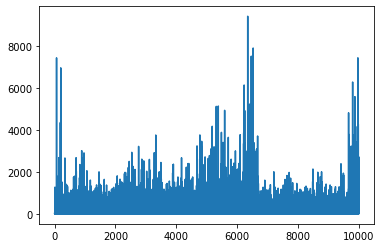

In [57]:
plt.plot(lpath)

## Harjoitus
## Realistisempi maailma "Pekka ja susi" -tarinalle



---

**Vastuuvapauslauseke**:  
Tämä asiakirja on käännetty käyttämällä tekoälypohjaista käännöspalvelua [Co-op Translator](https://github.com/Azure/co-op-translator). Pyrimme tarkkuuteen, mutta huomioithan, että automaattiset käännökset voivat sisältää virheitä tai epätarkkuuksia. Alkuperäistä asiakirjaa sen alkuperäisellä kielellä tulee pitää ensisijaisena lähteenä. Kriittisen tiedon osalta suositellaan ammattimaista ihmiskääntämistä. Emme ole vastuussa tämän käännöksen käytöstä johtuvista väärinkäsityksistä tai virhetulkinnoista.
